In [0]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
import glob 
import os

In [0]:
IMAGEPATH = '/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES'

In [0]:
path = os.path.join(IMAGEPATH,'*.jpg')

In [0]:
path

'/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/*.jpg'

In [0]:
images = sorted(glob.glob(path))

In [0]:
for fname in images:
  print(fname)

/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/1.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/10.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/11.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/12.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/13.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/14.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/15.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/16.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/17.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/18.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/19.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/2.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/20.jpg
/content/drive/My Drive/Colab Notebooks/CV Assignment 2/IMAGES/21.jpg
/content/drive/My Driv

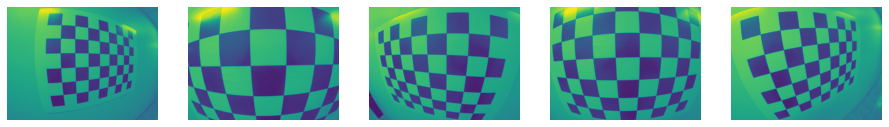

In [0]:
fig = plt.figure(figsize=(100,80))
for i,f in enumerate(images[::7]):
  img = cv2.imread(f)
  test=fig.add_subplot(1,len(images),i+1)
  test.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
  plt.axis('off')
plt.show()


In [0]:
#Term Criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

#No of intersections in the checkerboard image
nrow = 6
ncol = 8
#Defining World Co-odinates
worldpt = np.zeros((ncol * nrow, 3), np.float32)

In [0]:
worldpt[: ,:2] = np.mgrid[0:nrow, 0:ncol].T.reshape(-1, 2)

In [0]:
worldpt

array([[0., 0., 0.],
       [1., 0., 0.],
       [2., 0., 0.],
       [3., 0., 0.],
       [4., 0., 0.],
       [5., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [2., 1., 0.],
       [3., 1., 0.],
       [4., 1., 0.],
       [5., 1., 0.],
       [0., 2., 0.],
       [1., 2., 0.],
       [2., 2., 0.],
       [3., 2., 0.],
       [4., 2., 0.],
       [5., 2., 0.],
       [0., 3., 0.],
       [1., 3., 0.],
       [2., 3., 0.],
       [3., 3., 0.],
       [4., 3., 0.],
       [5., 3., 0.],
       [0., 4., 0.],
       [1., 4., 0.],
       [2., 4., 0.],
       [3., 4., 0.],
       [4., 4., 0.],
       [5., 4., 0.],
       [0., 5., 0.],
       [1., 5., 0.],
       [2., 5., 0.],
       [3., 5., 0.],
       [4., 5., 0.],
       [5., 5., 0.],
       [0., 6., 0.],
       [1., 6., 0.],
       [2., 6., 0.],
       [3., 6., 0.],
       [4., 6., 0.],
       [5., 6., 0.],
       [0., 7., 0.],
       [1., 7., 0.],
       [2., 7., 0.],
       [3., 7., 0.],
       [4., 7., 0.],
       [5., 7

In [0]:
objpoints = [] 
imgpoints = [] 

step = 100.0 / len(images)
val = 0
i = 1
num_img = len(images)

In [0]:
g = ()
for fname in images:
  image = cv2.imread(fname)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  g = gray.shape
  # Find the chess board corners
  flag, corners = cv2.findChessboardCorners(gray, (nrow, ncol), None)
  # print(type(gray))
  # If found, add object points, image points (after refining them)
  if flag:
      objpoints.append(worldpt)
      cv2.cornerSubPix(gray, corners, (11, 11), (-1, -1), criteria)
      imgpoints.append(corners)
      val += step
      img = cv2.drawChessboardCorners(gray.copy(), (width, height), corners, flag)
      plt.imshow(img)
      plt.show()
  i+= 1
  


In [0]:
flag, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, g[::-1],None,None)

In [0]:
print("Camera matrix")
print(mtx)


Camera matrix
[[559.66086702   0.         651.12251224]
 [  0.         560.74158563 498.77835168]
 [  0.           0.           1.        ]]


In [0]:
print("Distortion Coefficient")
print(dist)

Distortion Coefficient
[[-2.32230232e-01  6.13449663e-02  4.37961625e-06  5.48089828e-05
  -7.48458247e-03]]


In [0]:
print("Rotational Vectors")
print(rvecs)

Rotational Vectors
[array([[-0.18128353],
       [-0.325681  ],
       [ 1.5299215 ]]), array([[-0.08039556],
       [-0.40919357],
       [ 1.53571821]]), array([[ 0.05571882],
       [-0.15061176],
       [ 1.56718631]]), array([[-0.11123981],
       [-0.38132665],
       [ 1.51796674]]), array([[ 2.18801244e-01],
       [-1.45233397e-03],
       [ 1.57500741e+00]]), array([[ 0.2225431 ],
       [-0.19474127],
       [ 1.54565389]]), array([[ 0.40013489],
       [-0.05080037],
       [ 1.56237634]]), array([[ 0.32173044],
       [-0.1522358 ],
       [ 1.56734493]]), array([[ 0.34813389],
       [-0.03649048],
       [ 1.58782342]]), array([[ 0.33334742],
       [-0.1630268 ],
       [ 1.49422408]]), array([[-0.05768411],
       [-0.23332117],
       [ 1.52607269]]), array([[ 0.22559671],
       [ 0.37674965],
       [-1.59259087]]), array([[ 0.11566466],
       [ 0.17375615],
       [-1.58411476]]), array([[ 0.38401783],
       [-0.07595598],
       [ 1.58675165]]), array([[ 0.04757

In [0]:
print("Translation Vectors")
print(tvecs)

Translation Vectors
[array([[ 5.07330477],
       [-3.0575804 ],
       [ 6.27822629]]), array([[ 4.28288372],
       [-2.06675385],
       [ 5.06252701]]), array([[ 3.42754032],
       [-1.6263261 ],
       [ 4.02733642]]), array([[ 3.4254765 ],
       [-2.35824413],
       [ 4.73470276]]), array([[ 2.99538713],
       [-1.83651865],
       [ 3.35694412]]), array([[ 3.53523673],
       [-1.59819686],
       [ 2.61649715]]), array([[ 2.15787321],
       [-1.43457075],
       [ 2.12878328]]), array([[ 2.67831322],
       [-1.61887521],
       [ 2.3740471 ]]), array([[ 2.18287474],
       [-1.59238189],
       [ 2.26041859]]), array([[ 3.17472492],
       [-2.21155469],
       [ 2.97800931]]), array([[ 4.77460136],
       [-3.14887775],
       [ 7.24485693]]), array([[-3.51931817],
       [ 2.11933755],
       [ 5.17866568]]), array([[-3.8953033 ],
       [ 3.22964375],
       [ 3.87050808]]), array([[ 2.00365533],
       [-1.32159795],
       [ 2.47116533]]), array([[ 0.62885715],
     

In [0]:
test_image = '/content/drive/My Drive/Colab Notebooks/CV Assignment 2/test_image.jpg'
# test_image = '/content/drive/My Drive/Colab Notebooks/CV Assignment 2/image_2.jpg'

In [0]:
# print(test_image)

In [0]:
img = cv2.imread(test_image)
height,  width = img.shape[:2]
newcameramtx, roi=cv2.getOptimalNewCameraMatrix(mtx,dist,(width,height),1,(width,height))

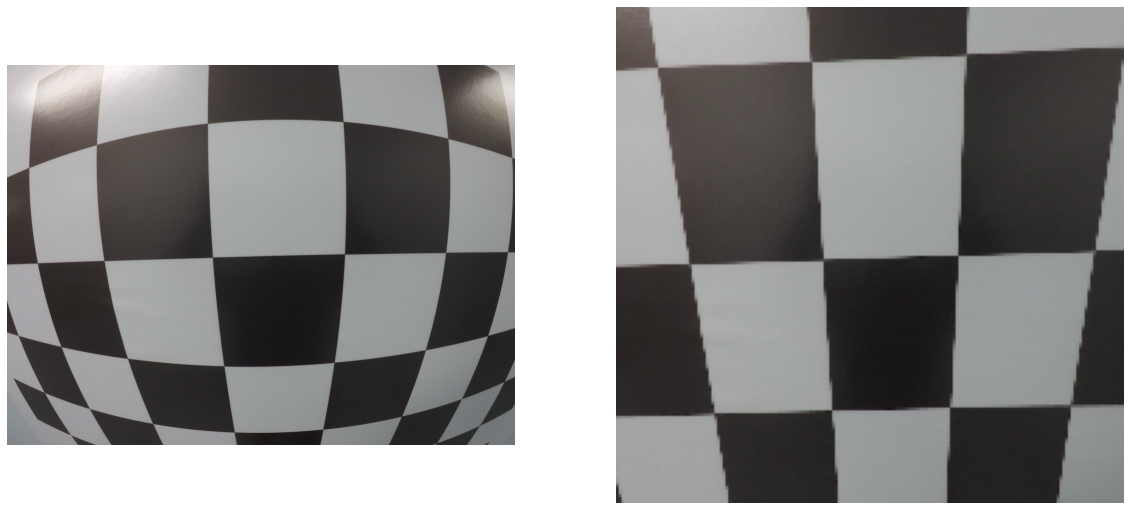

True

In [0]:
# undistort
dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# crop the image
x,y,w,h = roi
dst = dst[y:y+h, x:x+w]

fig = plt.figure(figsize = (20,15))
t = fig.add_subplot(1,2,1)
t.imshow(img)
plt.axis('off')
t = fig.add_subplot(1,2,2)
t.imshow(dst)
plt.axis('off')
plt.show()
cv2.imwrite('/content/drive/My Drive/Colab Notebooks/CV Assignment 2/CalibratedTest.jpg',dst)

In [0]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i],imgpoints2, cv2.NORM_L2)/len(imgpoints2)
    mean_error += error

print ('total error:{}'.format( mean_error/len(objpoints)))

total error:0.07848402246105136
